<a href="https://colab.research.google.com/github/chouat2207/Python/blob/main/ML_Challenge_Regression_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliothèques


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [ ]:
# Your code here :
df2018 = df_main.merge(df_opinion, how='left', left_on="DATE", right_on="date")


In [ ]:
df2018.drop('date', axis=1 , inplace= True)

In [ ]:
df2018['WEATHER_CODE_EVENING']= df2018['WEATHER_CODE_EVENING'].fillna(df2018['WEATHER_CODE_EVENING'].mean())
df2018['TOTAL_SNOW_MM']= df2018['TOTAL_SNOW_MM'].fillna(df2018['TOTAL_SNOW_MM'].mean())
df2018['UV_INDEX']= df2018['UV_INDEX'].fillna(df2018['UV_INDEX'].mean())

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [ ]:
# Your code here :
df_clean = df2018.dropna(subset='SUNHOUR')


In [ ]:
df_nan = df2018[df2018['SUNHOUR'].isna()]

In [ ]:
df_nan.shape

(24, 20)

## Now, train your model
For this part, let's work on df_clean.
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!).

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
X= df_clean[['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH','TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C','PRECIP_TOTAL_DAY_MM',
          'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM','PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C','DEWPOINT_MAX_C', 'WINDTEMP_MAX_C']]

y = df_clean['SUNHOUR']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75)
model1 = LinearRegression()
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)
r2_score_train = model1.score(X_train, y_train)

r2_score_test = r2_score(y_test, y_pred)

print("R² score du model 1 pour le train set:", r2_score_train)
print("R² score du model 1 on pour le test set:", r2_score_test)


R² score du model 1 pour le train set: 0.7170349682567019
R² score du model 1 on pour le test set: 0.7443504122096246


In [ ]:
X= df_clean[['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH','TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C','PRECIP_TOTAL_DAY_MM']]
y = df_clean['SUNHOUR']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75)
model2 = LinearRegression()
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)
r2_score_train = model2.score(X_train, y_train)

r2_score_test = r2_score(y_test, y_pred)

print("R² score du model 2 pour le train set:", r2_score_train)
print("R² score du model 2 on pour le test set:", r2_score_test)

R² score du model 2 pour le train set: 0.5907575958679651
R² score du model 2 on pour le test set: 0.40839595545138785


In [ ]:
X = df_clean.select_dtypes(include = ['float64','int64']).drop('SUNHOUR',axis = 1)
y = df_clean['SUNHOUR']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75)
model3 = LinearRegression()
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)
r2_score_train = model3.score(X_train, y_train)

r2_score_test = r2_score(y_test, y_pred)

print("R² score du model 3 pour le train set:", r2_score_train)
print("R² score  du model 3 on pour le test set:", r2_score_test)

R² score du model 3 pour le train set: 0.7321970058162455
R² score  du model 3 on pour le test set: 0.7410385257448747


## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [ ]:

X_nan = df_nan.select_dtypes(include=['float64', 'int64']).drop('SUNHOUR', axis=1)
df_nan['SUNHOUR'] = model3.predict(X_nan)




<ipython-input-61-3d6ca3120ad7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['SUNHOUR'] = model3.predict(X_nan)


In [ ]:
df_nan

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,118.507331,0.0,1.57478,7.503537,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,118.507331,0.0,1.57478,8.173789,NaN
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,118.507331,0.0,1.57478,7.450930,NaN
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,118.507331,0.0,1.57478,9.472168,NaN
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,118.507331,0.0,1.57478,6.434075,NaN
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,118.507331,0.0,1.57478,13.950660,NaN
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,118.507331,0.0,1.57478,14.197136,NaN
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,118.507331,0.0,1.57478,12.926878,NaN
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,118.507331,0.0,1.57478,10.036221,NaN
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,118.507331,0.0,1.57478,15.589248,NaN


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values.

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

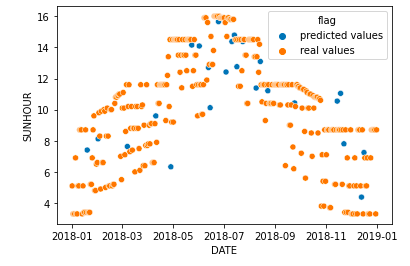

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_clean['flag'] = "real values"
df_nan['flag'] = "predicted values"

<ipython-input-67-c782c190a7a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['flag'] = "real values"
<ipython-input-67-c782c190a7a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['flag'] = "predicted values"


In [ ]:
df2018complete.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,...,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,real values
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,...,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,real values
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,...,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,real values
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,...,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,real values
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,...,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,real values


In [ ]:
df2018complete = pd.concat([df_clean,df_nan])
df2018complete['DATE'] = pd.to_datetime(df2018complete['DATE'])

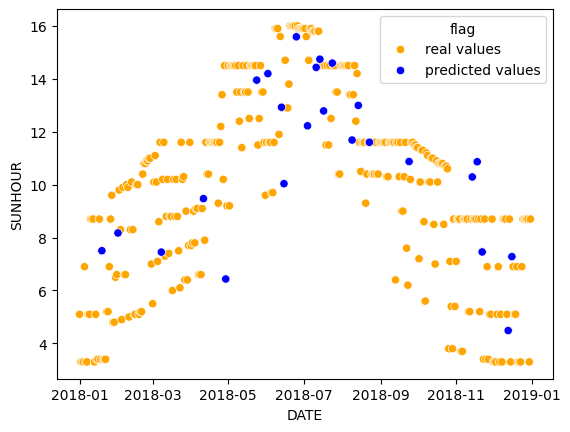

In [ ]:
custom_palette = {"real values": "orange", "predicted values": "blue"  }
sns.scatterplot(x=df2018complete['DATE'], y=df2018complete['SUNHOUR'], hue=df2018complete['flag'], palette= custom_palette)
plt.show()